In [86]:
import utils as utils_local
import sys
sys.path.append('/home/nithish/workspace/python/generic_tools/')
import numpy as np

import importlib
import data_sanity
import re

importlib.reload(data_sanity)


<module 'data_sanity' from '/home/nithish/workspace/python/generic_tools/data_sanity.py'>

In [87]:
df_bal = pd.read_csv('/home/nithish/workspace/python/fund_delta_model/data/SECTOR_15%_imputed.csv')


In [91]:

nse_mapping = pd.read_excel('/home/nithish/onedrive_folder/Fund_Delta_Model/nse_symbol_mappings.xls')

nse_mapping.drop_duplicates(inplace=True)
nse_mapping.dropna(inplace=True)

nse_mapping_dict = {}
for i,j in nse_mapping[['CO_CODE','[NSE Symbol']].values:
    nse_mapping_dict[i] = j

def map_func(x):
    if x in nse_mapping_dict:
        return nse_mapping_dict[x]
    else:
        return np.nan


In [97]:
for i in df_bal.CO_CODE.unique():
    print(i)

636
2551
13973
24049
40217
41261
42518
42523
45107
45955
68392
1375
2330
2720
2722
3709
4318
4987
5418
5433
5445
5456
5471
5475
5481
5493
5531
5533
5539
5554
5607
5638
5654
5675
5814
5859
5860
5955
5982
6025
6061
6263
7015
7311
7855
14602
25267
34695
54759
68090
60
4269
5056
28291
37
446
1627
17376
19466
22118
24061
24949
28589
65118
88
99
554
2303
2718
5455
8037
12001
12076
12584
12653
13240
14266
17808
18488
21953
27323
34819
66273
301
598
657
4621
12521
14270
27266
28009
519
1129
22648
27798


In [92]:
for i in df_bal.CO_CODE.unique():
    if i not in nse_mapping_dict:
        print(i)
        

2551
13973
24049
40217
41261
42518
42523
45107
45955
68392
2720
2722
5445
5475
5481
5533
5539
5607
5814
5859
5955
6025
7015
7311
34695
68090
4269
5056
28291
37
446
1627
17376
19466
22118
24061
24949
28589
65118
2303
2718
8037
12076
13240
14266
21953
27323
34819
66273
598
4621
14270
27266
28009
519
22648
27798


In [7]:

df_bal['nse_symbol'] = df_bal['CO_CODE'].apply(lambda x: map_func(x))
df_bal.columns = [re.sub('[^A-Za-z_]+', '', i) for i in df_bal.columns ] 
df_bal.columns = df_bal.columns.str.strip().str.lower().str.replace(' ',
                                                                      '_').str.replace('(', '').str.replace(')', '')

In [8]:
df_bal.columns

Index(['unnamed', 'co_code', 'co_name', 'yearend', 'resulttype_is',
       'noofmonths_is', 'grosssales', 'exciseduty', 'netsales',
       'otheroperatingincome',
       ...
       'deferredtaxassets', 'miscellaneousexpensesnotwoff', 'profitamplossac',
       'otherassets', 'totalassets', 'mode_bs', 'isbs', 'sector', 'mode_isbs',
       'nse_symbol'],
      dtype='object', length=142)

In [9]:
print(df_bal.shape)
df_bal = df_bal.loc[:,~df_bal.columns.duplicated()]
print(df_bal.shape)

(3266, 142)
(3266, 140)


In [10]:
bal_features = [i for i in df_bal.columns if i not in ['co_code','co_name','yearend','nse_symbol']]

In [18]:
remove_features_here = ['unnamed','resulttype_is','resulttype_is','entrydate','resultsannouncementdate','sector']

In [19]:
bal_features = [i for i in bal_features if i not in remove_features_here]

In [20]:
DS = data_sanity.CheckData( df_bal, date_col='yearend' ,
                           company_col='nse_symbol',
                          features = bal_features)

DS.check()


no of duplicate rows is 0


checking NAN values


                                       column_name  Percent_nan_Values
0                                    noofmonths_is            0.000000
1                                       grosssales            0.000000
2                                       exciseduty            0.000000
3                                         netsales            0.000000
4                             otheroperatingincome            0.000000
5                                      otherincome            0.000000
6                                  othermiscincome            0.000000
7                           gainonforextransaction            0.000000
8                            provisionswrittenback            0.000000
9                                      totalincome            0.000000
10                                totalexpenditure            0.000000
11                             rawmaterialconsumed            0.000000
12                        

                                       column_name  max_occuring_value  percentage
0                                    noofmonths_is                3.00  100.000000
1                                       grosssales                0.00   42.896509
2                                       exciseduty                0.00   92.192284
3                                         netsales                0.00    0.551133
4                             otheroperatingincome                0.00   66.778934
5                                      otherincome                0.00    1.775873
6                                  othermiscincome                0.00    1.806491
7                           gainonforextransaction                0.00   98.407838
8                            provisionswrittenback                0.00   99.724434
9                                      totalincome                0.00    0.091855
10                                totalexpenditure              100.08    0.091855
11  

In [38]:
# df_bal.to_csv('./reports/df_bal.csv',index=False)

In [10]:
# rem_cols_check_1 = "resulttype,noofmonths,equitysharewarrants,equityapplicationmoney,esopoutstanding,minorityinterest,securedloan,unsecuredloan,foreigncurrencymonetaryitemtranslationdiffa,liabilitiesonpoliciesinforce,deferredtaxliability,intangibleassets,loans,inventories,deferredtaxassets,miscellaneousexpensesnotwoff,profitlossac,noofmonths,sharecapital,equitysharewarrants,equityapplicationmoney,esopoutstanding,minorityinterest,securedloan,unsecuredloan,foreigncurrencymonetaryitemtranslationdiffa,liabilitiesonpoliciesinforce,deferredtaxliability,intangibleassets,loans,deferredtaxassets,miscellaneousexpensesnotwoff,profitlossac".split(",")


In [21]:
rem_cols_check_1 = "noofmonths_is,grosssales,exciseduty,otheroperatingincome,gainonforextransaction,provisionswrittenback,rawmaterialconsumed,stockadjustment,purchaseoffinishedgoods,poweroilampfuel,sellingampadministrativeexpenses,provisionsampwriteoffs,impairmentofassets,lossonforextransaction,packagingcost,freightcharges,developmentampconstructioncost,lossgaininforex,depreciation,miniumalternatetaxmat,fringebenefittax,deferredtax,extraordinaryitems,profitlossonsaleofassets,profitonsaleofassets,lossonsaleofassets,profitlossonsaleofinvestments,profitonsaleofinvestments,lossonsaleofinvestments,incomeexpensesrelatingtoprioryears,incomerelatingtoprioryears,expensesrelatingtoprioryears,depreciationprovwrittenbackforprevyear,depreciationonrevaluedfixedassets,gainlossoncancellationofforeignexchange,gaintoncancellationofforeignexchange,lossoncancellationofforeignexchange,vrsadjustment,otherextraordinaryincomeexpense,otherextraordinaryincome,otherextraordinaryexpenses,totalextraordinaryincomeexpense,taxonextraordinaryincomeexpense,deferredtaxonextraordinaryincomeexpense,netextraordinaryincomeexpense,epsbeforeexceptionalextraordinaryitemsbasic,epsbeforeexceptionalextraordinaryitemsdiluted,bookvalueunitcurr,dividendpersharers,dividend,equity,reserveampsurplus,facevalue,debtequityratio,debtservicecoverageratio,interestservicecoverageratio,debentureredemptionreserverscr,paidupdebtcapitalrscr,noofemployees,publicshareholdingnoofshares,publicshareholdinginequity,pledgedencumberednoofshares,pledgedencumberedintotalpromotersholding,pledgedencumberedintotalequity,nonencumberednoofshares,nonencumberedintotalpromotersholding,nonencumberedintotalequity,year,mode_is,resulttype_bs,noofmonths_bs,sharecapital,reservesampsurplus,equitysharewarrants,equityapplicationmoney,esopoutstanding,loanfunds,securedloan,unsecuredloan,foreigncurrencymonetaryitemtranslationdiffa,deferredtaxliability,otherliabilities,intangibleassets,loans,investments,currentassetsloansampadvances,inventories,sundrydebtors,cashampbankbalance,othercurrentassets,loansampadvances,currentliabilitiesampprovisions,currentliabilities,provisions,netcurrentassets,deferredtaxassets,miscellaneousexpensesnotwoff,profitamplossac,otherassets,mode_bs,isbs,mode_isbs".split(",")

In [22]:
rem_cols_check_1 = list(set(rem_cols_check_1))

In [23]:
rem_cols =['co_code' , 'co_name'] + remove_features_here
df_bal.drop(columns=rem_cols , inplace=True)

print(df_bal.shape)
df_bal.dropna(subset=['yearend','nse_symbol'] , inplace=True)
print(df_bal.shape)

(3266, 133)
(1427, 133)


In [25]:
df_bal.columns

Index(['yearend', 'noofmonths_is', 'grosssales', 'exciseduty', 'netsales',
       'otheroperatingincome', 'otherincome', 'othermiscincome',
       'gainonforextransaction', 'provisionswrittenback',
       ...
       'netcurrentassets', 'deferredtaxassets', 'miscellaneousexpensesnotwoff',
       'profitamplossac', 'otherassets', 'totalassets', 'mode_bs', 'isbs',
       'mode_isbs', 'nse_symbol'],
      dtype='object', length=133)

In [26]:
sel_cols = [i for i in df_bal.columns if i not in rem_cols_check_1]

In [28]:
print(df_bal.shape)
df_bal = df_bal[sel_cols]
print(df_bal.shape)

(1427, 31)
(1427, 31)


In [29]:
df_bal.yearend = df_bal.yearend.apply(lambda x: int(x))

df_bal.yearend = pd.to_datetime(df_bal.yearend.apply(lambda x:str(x)[:4]+'-'+str(x)[-2:]))

In [30]:
final_bal_features = [i for i in df_bal.columns if i not in ['yearend','nse_symbol']]

In [31]:

df_ratios = utils_local.pd_xls_read('/home/nithish/onedrive_folder/Fund_Delta_Model/all_price_ratios.xls')

print(df_ratios.shape)

features = df_ratios.columns

features = features[3:]; features = features[:-2]

df_ratios['nse_symbol'] = df_ratios['CO_CODE'].apply(lambda x: map_func(x))

df_ratios.columns = [re.sub('[^A-Za-z_]+', '', i) for i in df_ratios.columns ] 

                                                            
df_ratios.columns = df_ratios.columns.str.strip().str.lower().str.replace(' ',
                                                            '_').str.replace('(', '').str.replace(')', '')


rem_cols = ['co_code','co_name','mode','yearmonth']
df_ratios.drop(columns= rem_cols , inplace=True)

df_ratios.columns

df_ratios.date = pd.to_datetime(df_ratios.date)
ratios_features = df_ratios.columns[2:-1]


KeyboardInterrupt: 

In [12]:
df_ratios['weekday'] = df_ratios.date.apply(lambda x: x.weekday())
week_days_index = [0,1,2,3,4] # weekdays , monday -> friday
print(df_ratios.shape)
df_ratios = df_ratios[df_ratios.weekday.isin(week_days_index)]

print(df_ratios.shape)
df_ratios.drop(columns = ['weekday'] , inplace=True)

(639920, 13)
(571367, 13)


In [13]:
df_ratios.to_pickle('./data/data_store/df_ratios.pkl')

In [32]:
df_ratios = pd.read_pickle('./data/data_store/df_ratios.pkl')

In [33]:
## read the new ea dates file
path1 = '/home/nithish/onedrive_folder/Fund_Delta_Model/new_ea_new_all.xlsx'

xls = pd.ExcelFile(path1)

snames = xls.sheet_names[2:]
big_df = pd.DataFrame()

for i in snames:
    small_df = xls.parse(i).iloc[:,:2]
    
    if small_df.shape[1]>2:
        print(small_df)
    
    small_df['nse_symbol'] = i 
    print(small_df.shape)
    if small_df.columns.tolist()!=['company_name', 'Earning Announcement Dates', 'nse_symbol']:
        continue
    big_df = pd.concat((big_df,small_df),sort=False)
    
# big_df.nse_symbol = big_df.nse_symbol.apply(lambda x : x.split('-')[1])
big_df.columns = big_df.columns.str.strip().str.lower().str.replace(' ',
                                                            '_').str.replace('(', '').str.replace(')', '')
big_df = big_df.iloc[:,1:].reset_index(drop=True)
# big_df.rename(columns= { 'earning_announcement_dates': 'date'} , inplace=True  )
big_df = big_df.dropna()

(64, 3)
(49, 3)
(36, 3)
(32, 3)
(19, 3)
(55, 3)
(75, 3)
(49, 3)
(1, 3)
(55, 3)
(39, 3)
(60, 3)
(67, 3)
(49, 3)
(28, 3)
(4, 3)
(41, 3)
(44, 3)
(68, 3)
(1, 3)
(24, 3)
(1, 3)
(1, 3)
(80, 3)
(1, 3)
(59, 3)
(39, 3)
(38, 3)
(71, 3)
(36, 3)
(63, 3)
(63, 3)
(37, 3)
(59, 3)
(67, 3)
(63, 3)
(8, 3)
(73, 3)
(74, 3)
(59, 3)
(72, 3)
(34, 3)
(57, 3)
(70, 3)
(51, 3)
(64, 3)
(35, 3)
(35, 3)
(38, 3)
(30, 3)
(64, 3)
(59, 3)
(17, 3)
(22, 3)
(40, 3)
(47, 3)
(79, 3)
(66, 3)
(32, 3)
(23, 3)
(1, 3)
(1, 3)
(4, 3)
(23, 3)
(51, 3)
(56, 3)
(1, 3)
(71, 3)
(62, 3)
(43, 3)
(79, 3)
(33, 3)
(60, 3)
(13, 3)
(77, 3)
(28, 3)
(75, 3)
(60, 3)
(73, 3)
(5, 3)
(16, 3)
(1, 3)
(79, 3)
(33, 3)
(55, 3)
(39, 3)
(1, 3)
(55, 3)
(50, 3)
(10, 3)
(20, 3)
(18, 3)
(1, 3)
(8, 3)
(11, 3)
(64, 3)
(13, 3)
(29, 3)
(83, 3)
(6, 3)
(43, 3)
(1, 3)
(33, 3)
(74, 3)
(29, 3)
(2, 3)
(75, 3)
(10, 3)
(12, 3)
(61, 3)
(67, 3)
(40, 3)
(67, 3)
(35, 3)
(26, 3)
(59, 3)
(68, 3)
(33, 3)
(52, 3)
(48, 3)
(42, 3)
(1, 3)
(90, 3)
(4, 3)
(88, 3)
(51, 3)
(63, 3)
(60, 

In [34]:
df_fund_with_ea = pd.merge_asof(df_bal.sort_values('yearend') , big_df.sort_values('earning_announcement_dates'),
                               by='nse_symbol' , left_on = 'yearend' , right_on='earning_announcement_dates',
                               direction='forward')

# df_fund_with_ea[[ 'nse_symbol','yearend', 'earning_announcement_dates']].to_csv('reports/check1.csv',index=False)

df_fund_with_ea['dates_diff'] = df_fund_with_ea.earning_announcement_dates - df_fund_with_ea.yearend

df_fund_with_ea.dates_diff = df_fund_with_ea.dates_diff.apply(lambda x :  x.days)

df_fund_with_ea = df_fund_with_ea[df_fund_with_ea.dates_diff<180]

In [35]:
df_ratios.rename(columns = {'date':'ratios_init_date'} , inplace=True)

fund_ratios_df = pd.merge_asof(df_fund_with_ea.sort_values('earning_announcement_dates') , df_ratios.sort_values('ratios_init_date') ,
                               left_on='earning_announcement_dates',right_on='ratios_init_date',
                              by = 'nse_symbol',direction='backward')

In [37]:
df_ratios.columns
ratios_features = [i for i in df_ratios.columns if i not in ['nse_symbol','ratios_init_date']]

In [42]:
df_features = utils_local.create_delta_features(fund_ratios_df,'nse_symbol','yearend',
                                 features= final_bal_features+ratios_features,
                                 delta=[1,2,4],d_delta=[1,2,4])

delta_features = [i for i in df_features.columns if i not in fund_ratios_df.columns]

In [38]:
ratios_momentum,ratios_momentum_features = utils_local.make_momentum_features(df_ratios , 'nse_symbol', 
                                                                              'ratios_init_date',
                                                    ratios_features , days=[1,3,7])

/home/nithish/workspace/python/fund_delta_model/utils.py:165: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(price_df[new_features].values)
/home/nithish/workspace/python/fund_delta_model/utils.py:165: RuntimeWarning: invalid value encountered in true_divide
  np.abs(price_df[new_features].values)


In [39]:
sub_ratios_momentum = ratios_momentum[['ratios_init_date','nse_symbol']+ratios_momentum_features]

In [40]:
sub_ratios_momentum.rename(columns = {'ratios_init_date':'ratios_mom_date'} , inplace=True)

/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [43]:
df_with_ratiosmom = pd.merge_asof(df_features.sort_values('earning_announcement_dates'),
                                 sub_ratios_momentum.sort_values('ratios_mom_date'),
                                 left_on='earning_announcement_dates',right_on='ratios_mom_date',
                                 by='nse_symbol',
                                 direction='backward')

df_with_ratiosmom['dates_diff'] = df_with_ratiosmom['earning_announcement_dates'] - df_with_ratiosmom['ratios_mom_date']

# df_with_ratiosmom[['nse_symbol','earning_announcement_dates',
#                    'ratios_mom_date','dates_diff']].to_csv('./reports/check2.csv')

In [ ]:

df_prices = utils_local.pd_xls_read('/home/nithish/onedrive_folder/Fund_Delta_Model/all_prices.xls')

df_prices.columns

df_prices["[NSE Symbol"] = df_prices.CO_CODE.apply(lambda x: map_func(x))

df_prices.dropna(subset=["[NSE Symbol"] , inplace=True)

rename_cols_2 = {
    "[NSE Symbol":'nse_symbol',
    "[Open Price": "open_price",
    "[Date": "date",
    "[Close Price": "close_price",
}

df_prices.rename(columns=rename_cols_2,inplace=True)
df_prices.reset_index(inplace=True,drop=True)

df_prices = df_prices[list(rename_cols_2.values())]

df_prices['weekday'] = df_prices.date.apply(lambda x: x.weekday())
week_days_index = [0,1,2,3,4] # weekdays , monday -> friday
print(df_prices.shape)
df_prices = df_prices[df_prices.weekday.isin(week_days_index)]
print(df_prices.shape)
df_prices.drop(columns = ['weekday'] , inplace=True)

daywise_returns , ret_col_names = utils_local.make_target_open(df_prices, days=list(range( 0,90 ))  , 
                                                         company_col='nse_symbol',
                                                       date_col = 'date')

##### make price momentum features

daywise_returns , pm_cols = utils_local.make_price_momentum_features(daywise_returns ,company_col='nse_symbol',
                                                        date_col='date',days = [3,7,15,30])

daywise_returns['weekday'] = daywise_returns.date.apply(lambda x: x.weekday())
week_days_index = [0,1,2,3,4] # weekdays , monday -> friday
print(daywise_returns.shape)
daywise_returns = daywise_returns[daywise_returns.weekday.isin(week_days_index)]
print(daywise_returns.shape)

daywise_returns.to_pickle('./data/data_store/price_df_open_to_open_new.pkl')

df_prices.to_pickle('./data/data_store/df_prices_all_new.pkl')

In [44]:
daywise_returns  =pd.read_pickle('./data/data_store/price_df_open_to_open_new.pkl')

df_prices = pd.read_pickle('./data/data_store/df_prices_all_new.pkl')

pm_cols = daywise_returns.columns[-5:-1].tolist()

In [46]:

import datetime


all_features = delta_features + ratios_momentum_features  + pm_cols

# df_prices = df_prices[df_prices.date.dt.year>=2010]

df_with_ratiosmom.head()

daywise_returns.rename(columns = {'date':'price_mom_date'},inplace=True)

price_mom_for_join = daywise_returns[['nse_symbol','price_mom_date']+pm_cols]

df_with_ratiosmom.earning_announcement_dates

df_withratios_price_mom = pd.merge_asof(df_with_ratiosmom.sort_values('earning_announcement_dates') 
                                        , price_mom_for_join.sort_values('price_mom_date') , 
                                       left_on = 'earning_announcement_dates',right_on='price_mom_date' , 
                                       by='nse_symbol' , direction = 'backward')

# df_withratios_price_mom[['nse_symbol','earning_announcement_dates',
#                           'price_mom_date']].to_csv('./reports/check3.csv',index=False)

df_withratios_price_mom['dates_diff'] = df_withratios_price_mom['earning_announcement_dates']  - \
                                        df_withratios_price_mom['price_mom_date']

df_withratios_price_mom['dates_diff'] = df_withratios_price_mom['dates_diff'].apply(lambda x: x.days)

df_withratios_price_mom = df_withratios_price_mom[df_withratios_price_mom.dates_diff<=20]

In [55]:
df_withratios_price_mom.to_pickle('./data/balance_sheet_cons.pkl')

df_withratios_price_mom = pd.read_pickle('./data/balance_sheet_cons.pkl')

In [47]:
DS = data_sanity.CheckData( df_withratios_price_mom, date_col='earning_announcement_dates' ,
                           company_col='nse_symbol',
                          features = all_features)

DS.check()


no of duplicate rows is 0


checking NAN values


                                          column_name  Percent_nan_Values
0                                           netsales1            4.021448
1                                        otherincome1            4.691689
2                                    othermiscincome1            4.691689
3                                        totalincome1            3.887399
4                                   totalexpenditure1            3.887399
5                                   employeeexpenses1            4.021448
6                                      otherexpenses1            3.887399
7                                              pbidt1            3.887399
8                                           interest1            4.289544
9                                               pbdt1            3.887399
10                                               pbt1            3.887399
11                                               tax1        

                                          column_name  max_occuring_value  percentage
0                                           netsales1       -3.210304e+01    0.134048
1                                        otherincome1                 inf    0.402145
2                                    othermiscincome1                 inf    0.402145
3                                        totalincome1       -5.432515e+01    0.134048
4                                   totalexpenditure1       -7.762265e+01    0.134048
5                                   employeeexpenses1       -1.260859e+02    0.134048
6                                      otherexpenses1       -1.000000e+02    0.134048
7                                              pbidt1       -2.848160e+02    0.134048
8                                           interest1                 inf    0.268097
9                                               pbdt1       -9.291160e+03    0.134048
10                                               pbt1 

In [2]:
# from all_features import all_features

In [48]:
# rem_features = "bookvalue1,loanfunds2,otherliabilities2,othercurrentassets2,loansadvances2,otherassets2,dividendyield2,reservessurplus4,loanfunds4,otherliabilities4,totalliabilities4,fixedassets4,investments4,currentassetsloansadvances4,sundrydebtors4,cashbankbalance4,othercurrentassets4,loansadvances4,currentliabilitiesprovisions4,currentliabilities4,provisions4,netcurrentassets4,otherassets4,totalassets4,enterprisevalue4,pricetoearning4,pricetocasheps4,evtopbidt4,dividendyield4,pricetobv4,pricetocashflow4,marketcapsales4,bookvalue4,eps4,loanfunds_dd1,otherliabilities_dd1,othercurrentassets_dd1,loansadvances_dd1,otherassets_dd1,pricetoearning_dd1,dividendyield_dd1,bookvalue_dd1,eps_dd1,loanfunds_dd2,otherliabilities_dd2,investments_dd2,currentassetsloansadvances_dd2,sundrydebtors_dd2,cashbankbalance_dd2,othercurrentassets_dd2,loansadvances_dd2,currentliabilitiesprovisions_dd2,currentliabilities_dd2,provisions_dd2,netcurrentassets_dd2,otherassets_dd2,pricetoearning_dd2,pricetoca sheps_dd2,dividendyield_dd2,pricetobv_dd2,pricetocashflow_dd2,marketcapsales_dd2,bookvalue_dd2,eps_dd2,reservessurplus_dd4,loanfunds_dd4,otherliabilities_dd4,totalliabilities_dd4,fixedassets_dd4,investments_dd4,currentassetsloansadvances_dd4,sundrydebtors_dd4,cashbankbalance_dd4,othercurrentassets_dd4,loansadvances_dd4,currentliabilitiesprovisions_dd4,currentliabilities_dd4,provisions_dd4,netcurrentassets_dd4,otherassets_dd4,totalassets_dd4,enterprisevalue_dd4,pricetoearning_dd4,pricetocasheps_dd4,evtopbidt_dd4,dividendyield_dd4,pricetobv_dd4,pricetocashflow_dd4,marketcapsales_dd4,bookvalue_dd4,eps_dd4,bookvalue_mom_1,eps_mom_1,bookvalue_mom_3,eps_mom_3,bookvalue_mom_7,eps_mom_7,bookvalue_mom_1,eps_mom_1,bookvalue_mom_3,eps_mom_3,bookvalue_mom_7,eps_mom_7".split(",")

rem_features = "dividendyield1,bookvalue1,eps1,dividendyield2,bookvalue2,othertax4,dividendyield4,othertax_dd1,epsafterexceptionalextraordinaryitemsdiluted_dd1,dilutedepsadjunitcurr_dd1,pricetoearning_dd1,pricetocasheps_dd1,dividendyield_dd1,bookvalue_dd1,eps_dd1,othertax_dd2,epsafterexceptionalextraordinaryitemsdiluted_dd2,dilutedepsadjunitcurr_dd2,pricetoearning_dd2,pricetocasheps_dd2,dividendyield_dd2,pricetobv_dd2,marketcapsales_dd2,bookvalue_dd2,eps_dd2,tax_dd4,othertax_dd4,epsafterexceptionalextraordinaryitemsbasic_dd4,epsadjunitcurr_dd4,calculatedepsunitcurr_dd4,calculatedepsadjunitcurr_dd4,calculatedepsannunitcurr_dd4,calculatedepsadjannunitcurr_dd4,epsafterexceptionalextraordinaryitemsdiluted_dd4,dilutedepsadjunitcurr_dd4,enterprisevalue_dd4,pricetoearning_dd4,pricetocasheps_dd4,evtopbidt_dd4,dividendyield_dd4,pricetobv_dd4,pricetocashflow_dd4,marketcapsales_dd4,bookvalue_dd4,eps_dd4,bookvalue_mom_1,eps_mom_1,bookvalue_mom_3,eps_mom_3,bookvalue_mom_7,eps_mom_7".split(",")


In [49]:
rem_features = list(set(rem_features))

In [50]:
features = [i for i in all_features if i not in rem_features]

In [51]:
len(all_features) , len(rem_features) , len(features)

(268, 51, 217)

In [52]:
all_features

['netsales1',
 'otherincome1',
 'othermiscincome1',
 'totalincome1',
 'totalexpenditure1',
 'employeeexpenses1',
 'otherexpenses1',
 'pbidt1',
 'interest1',
 'pbdt1',
 'pbt1',
 'tax1',
 'othertax1',
 'reportedprofitaftertax1',
 'adjustedprofitafterextraordinaryitem1',
 'epsafterexceptionalextraordinaryitemsbasic1',
 'epsadjunitcurr1',
 'calculatedepsunitcurr1',
 'calculatedepsadjunitcurr1',
 'calculatedepsannunitcurr1',
 'calculatedepsadjannunitcurr1',
 'epsafterexceptionalextraordinaryitemsdiluted1',
 'dilutedepsadjunitcurr1',
 'pbidtm1',
 'pbdtm1',
 'patm1',
 'totalliabilities1',
 'fixedassets1',
 'totalassets1',
 'enterprisevalue1',
 'pricetoearning1',
 'pricetocasheps1',
 'evtopbidt1',
 'dividendyield1',
 'pricetobv1',
 'pricetocashflow1',
 'marketcapsales1',
 'bookvalue1',
 'eps1',
 'netsales2',
 'otherincome2',
 'othermiscincome2',
 'totalincome2',
 'totalexpenditure2',
 'employeeexpenses2',
 'otherexpenses2',
 'pbidt2',
 'interest2',
 'pbdt2',
 'pbt2',
 'tax2',
 'othertax2',
 'r

In [53]:
import create_target_classes

import data_sanity

In [54]:
df_withratios_price_mom.shape

(746, 314)

In [55]:
DS = data_sanity.CheckData( df_withratios_price_mom, date_col='earning_announcement_dates' ,
                           company_col='nse_symbol',
                          features = features)

DS.check()


no of duplicate rows is 0


checking NAN values


                                        column_name  Percent_nan_Values
0                                         netsales1            4.021448
1                                      otherincome1            4.691689
2                                  othermiscincome1            4.691689
3                                      totalincome1            3.887399
4                                 totalexpenditure1            3.887399
5                                 employeeexpenses1            4.021448
6                                    otherexpenses1            3.887399
7                                            pbidt1            3.887399
8                                         interest1            4.289544
9                                             pbdt1            3.887399
10                                             pbt1            3.887399
11                                             tax1            5.361930
12           

                                        column_name  max_occuring_value  percentage
0                                         netsales1       -3.210304e+01    0.134048
1                                      otherincome1                 inf    0.402145
2                                  othermiscincome1                 inf    0.402145
3                                      totalincome1       -5.432515e+01    0.134048
4                                 totalexpenditure1       -7.762265e+01    0.134048
5                                 employeeexpenses1       -1.260859e+02    0.134048
6                                    otherexpenses1       -1.000000e+02    0.134048
7                                            pbidt1       -2.848160e+02    0.134048
8                                         interest1                 inf    0.268097
9                                             pbdt1       -9.291160e+03    0.134048
10                                             pbt1       -9.291160e+03    0

In [127]:
import create_target_classes

In [371]:
# create out_df

out_df = create_target_classes.make_target_classes(df_prices.iloc[:,:4]
                                ,col='open_price',threshold=3,
                               sq_off_days=15,company_col='nse_symbol', date_col = 'date')
out_df.rename(columns={'date':'prices_date'} , inplace=True)

out_df.to_pickle('./data/data_store/out_df_new_15_day_threshold3.pkl')
print('out_df saved')
# out_df = pd.read_pickle('./data/prices_with_target.pkl')
out_df.rename(columns={'date_new': 'prices_date'} , inplace=True)

out_df saved


In [56]:
#read out_df
out_df = pd.read_pickle('./data/data_store/out_df.pkl')

In [58]:
import datetime

In [59]:
df_withratios_price_mom['reference_date'] = df_withratios_price_mom['earning_announcement_dates']   \
                                             + datetime.timedelta(2)

In [ ]:
# sectoral_indxs = pd.read_csv('/home/nithish/onedrive_folder/Fund_Delta_Model/sector_mappings.csv')

In [788]:

# symbol_sector_map = pd.read_csv('./reports/my_sector_mappings.csv')

# symbol_sector_map =dict(symbol_sector_map[['[NSE Symbol' , 'my_sector']].values)
# total['sector'] = total.nse_symbol.apply(lambda i_: symbol_sector_map[i_])
#     from sklearn.preprocessing import LabelBinarizer
#     # total = total[total.nse_symbol.isin(x_list['it'])]
#     lb = LabelBinarizer()
#     lb.fit(total.sector)
#     sect_df = pd.DataFrame(lb.transform(total.sector),columns=['sect_'+i for i in lb.classes_])

#     total = pd.concat([total,sect_df] , axis=1)

In [622]:
# total[features] = total[features].replace([np.inf , -np.inf] , np.nan)

# total[features] = total[features].fillna(1e10)

# train = total[total.earning_announcement_dates.dt.year<=2015]
# test = total[total.earning_announcement_dates.dt.year>=2016]

# X_train = train[features]
# y_train = train.target_class.astype(int)
# X_test = test[features]
# y_test = test.target_class.astype(int)

In [60]:
sys.path.append('/home/nithish/workspace/python/generic_tools/')

In [61]:

from sklearn.preprocessing import RobustScaler,StandardScaler , MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train) ; X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
import sliding_cv

import backtest
import random
from sklearn import clone

In [68]:
# from sklearn.svm import SVC

In [62]:
def custom_prec(y_true,y_pred):
    l_ = precision_score(y_true , y_pred,average=None)
    return (l_[0] + l_[-1])/2

def custom_prec_scorer(estimator,X,y):
    p_ = estimator.predict(X)
    return custom_prec( y,p_  )

In [63]:
from copy import deepcopy

import sliding_cv

In [64]:
x = pd.read_csv('./reports/my_sector_mappings.csv')

x =dict(x[['[NSE Symbol' , 'my_sector']].values)

from collections import defaultdict

x_list = defaultdict(list)

for i,j in x.items():
    x_list[j].append(i)

In [ ]:
for i in x_list:
    l_ = x_list[i]
    sub = total[total.nse_symbol.isin(l_)]
    print(i , sub.nse_symbol.nunique())
x_ = sliding_cv.purged_cv(total.earning_announcement_dates , 0,300)

for train_ind,test_ind in x_:
       
        train = total.iloc[train_ind]
        test = total.iloc[test_ind]
        print(train.earning_announcement_dates.min(),train.earning_announcement_dates.max())
        print(test.earning_announcement_dates.min(),test.earning_announcement_dates.max())

In [65]:

def fit_with_fs(estimator ,X,y, fr,date_col_here ):
    model = clone(estimator)
    
    X.reset_index(drop=True,inplace=True)
    y.reset_index(drop=True , inplace=True)
    
#     print(date_col_here.min() , date_col_here.max())
    date_col_here.reset_index(drop=True, inplace=True)
    val_cv = sliding_cv.purged_cv(date_col_here,360,TEST_PERIOD)
    val_cv = val_cv[-3:]
#     print(len(val_cv))
#     for i,j in val_cv:
#         print(max(i) , max(j))
#     print(X.shape , 'X_ins shape')
#     print('done!!!! val_cv')
    sfs1 = SFS(model, 
           k_features=fr, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring= 'accuracy',
           cv=val_cv,
          n_jobs=25)
#     print(type(y_inside))
    sfs1.fit(X,y.values)
    model_features = list(sfs1.k_feature_names_)
    model.fit(X[model_features],y)
    return model, model_features


In [66]:
from sklearn.decomposition import PCA

In [67]:


def sliding_window_preds(model ,total,features,cv,fr,feat_select=False,n_comps=-1):
    
#     cv_here = sliding_cv.sliding_splits(total.earning_announcement_dates,train_days,test_days)[-2:]
    cv_here = cv
    total_train_ = pd.DataFrame()
    total_test_ = pd.DataFrame()
    total_preds = []
    total_train_preds = []
    total_gold = []
#     ret_list = []
    for train_ind,test_ind in cv_here:
       
        train = total.iloc[train_ind]
        test = total.iloc[test_ind]
        X_train = train[features]
        y_train = train.target_class.astype(int)
        X_test = test[features]
        y_test = test.target_class.astype(int)
        
        if n_comps > 0:
            pca = PCA(n_components=n_comps)
            print('actual', X_train.shape)
            X_train = pca.fit_transform(X_train)
            print('projected', X_train.shape)
            print("n_comps explained variance",  n_comps,
                  sum(pca.explained_variance_ratio_))

            X_test = pca.transform(X_test)
            
            model_new = clone(model)
#             print(X_train.shape, X_train[features].dropna().shape)
            model_new.fit(X_train,y_train)
#             print(sel_features)
            preds = model_new.predict(X_test)
            train_preds = model_new.predict(X_train)
        

        elif feat_select:
            model_here = clone(model)
            model_here , sel_features = fit_with_fs(model_here,X_train,y_train,fr,train.earning_announcement_dates)
            model_new = clone(model)
            model_new.fit(X_train[sel_features],y_train)
            print(sel_features)
            preds = model_new.predict(X_test[sel_features])
            train_preds = model_new.predict(X_train[sel_features])
        
        else:
#             model_here = clone(model)
#             model_here , sel_features = fit_with_fs(model_here,X_train,y_train,fr,train.earning_announcement_dates)
            model_new = clone(model)
            print(X_train[features].shape, X_train[features].dropna().shape)
            model_new.fit(X_train[features],y_train)
#             print(sel_features)
            preds = model_new.predict(X_test[features])
            train_preds = model_new.predict(X_train[features])
        
        total_test_ = pd.concat([total_test_ , test])
        total_train_ = pd.concat([total_train_ , train])
        total_preds = total_preds + list(preds)
        total_train_preds = total_train_preds + list(train_preds)
        total_gold = total_gold + list(y_test)

#             sub_sig = native_signal_df(test , preds)
#             ret_ = backtest.get_return_day_wise(sub_sig, signals_list, df_prices_sub,
#                                                        'open_price', 'open_price',sl_rules,
#                                                      portfolio_limits )
#             ret_list.append(ret_[-1]['roi'])
    
        
    return total_test_ , total_preds,total_gold ,total_train_preds , total_train_
        

def native_signal_df(test , preds):

    test.rename(columns = {'prices_date':'date'} , inplace=True)
    test['exit_date'] = test['exit_date']
    
    print(preds)
    signal_df = make_signal_df(test,preds)

    signal_df.date = pd.to_datetime(signal_df.date)
    signal_df.sq_off_date = pd.to_datetime(signal_df.sq_off_date)

    signal_df.date = signal_df.date.apply(lambda x: x.date())
    signal_df.sq_off_date = signal_df.sq_off_date.apply(lambda x: x.date())
    
    return signal_df


In [68]:
def all_returns_local(test , preds,signals_list,df_prices,
                  sl_rules , portfolio_limits):
    sig_all = native_signal_df(test , preds)
    ret_ = backtest.get_return_day_wise(sig_all, signals_list, df_prices_sub,
                                       'open_price', 'open_price',sl_rules,
                                 portfolio_limits )
    return ret_

In [69]:
pd.options.mode.chained_assignment = None # default='warn'


In [73]:
out_df.rename(columns={'date_new':'prices_date'},inplace=True)

In [74]:
total = pd.merge_asof(df_withratios_price_mom.sort_values('reference_date'),
                            out_df.sort_values('prices_date'),left_on='reference_date',
                            right_on='prices_date',by = 'nse_symbol',
                          direction = 'forward')
# total.drop_duplicates(subset=['nse_symbol','earning_announcement_dates'])

# total = total[total.earning_announcement_dates.dt.year>2010]
total = total[total.earning_announcement_dates.dt.year<2019]

total.target_class = total.target_class.fillna(0)
finance_sector = x_list['finance'] #+ x_list['auto']
pharma_sector = x_list['pharma']

# total = total[total.nse_symbol.isin(pharma_sector)]

total.nse_symbol.nunique()

x = df_prices[df_prices.nse_symbol.isin(total.nse_symbol.unique())]
x.date = pd.to_datetime(x.date)
# x = x[x.date.dt.year>2010]
x.date = x.date.apply(lambda x:x.date())
x = x.sort_values('date')
x.rename(columns={'nse_symbol':'ticker'},inplace=True)

df_prices_sub = x

In [233]:
# total[total.sq_off_days==1][['earning_announcement_dates','nse_symbol','target_class']]

array(['YESBANK', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'KOTAKBANK',
       'TORNTPOWER', 'KTKBANK', 'NTPC', 'RELINFRA', 'DCBBANK',
       'SOUTHBANK', 'ORIENTBANK', 'UNIONBANK', 'RPOWER', 'TATAPOWER',
       'CESC', 'PAGEIND', 'KAJARIACER', 'PNB', 'SYNDIBANK', 'POWERGRID',
       'SBIN', 'ADANIPOWER', 'NHPC', 'BANKBARODA', 'CANBK', 'IDFCFIRSTB',
       'BANKINDIA', 'ITC', 'APOLLOHOSP'], dtype=object)

In [169]:
# good_features = "netsales1,otherincome1,othermiscincome1,totalincome1,totalexpenditure1,otherexpenses1,pbidt1,pbdt1,pbt1,tax1,adjustedprofitafterextraordinaryitem1,epsafterexceptionalextraordinaryitemsbasic1,pbidtm1,pbdtm1,patm1,netsales2,totalincome2,totalexpenditure2,pbidt2,pbdt2,pbt2,tax2,adjustedprofitafterextraordinaryitem2,pbidtm2,pbdtm2,patm2,netsales_dd1,totalincome_dd1,totalexpenditure_dd1,pbidt_dd1,pbdt_dd1,adjustedprofitafterextraordinaryitem_dd1,pbidtm_dd1,evtopbidt_mom_1,pricetobv_mom_1,evtopbidt_mom_3,pricetobv_mom_3,marketcapsales_mom_3,evtopbidt_mom_7,pricetobv_mom_7,marketcapsales_mom_7,price_mom_3,price_mom_7,price_mom_15,price_mom_30".split(',')



In [170]:
# total[good_features+['nse_symbol','earning_announcement_dates']].to_csv('./reports/good_features.csv',index=False)

In [234]:
total.reset_index(drop=True , inplace=True)

In [235]:
TRAIN_PERIOD = 360*5
TEST_PERIOD= 180

In [236]:
importlib.reload(sliding_cv)

<module 'sliding_cv' from '/home/nithish/workspace/python/generic_tools/sliding_cv.py'>

In [384]:
new_cv = sliding_cv.sliding_splits(total.earning_announcement_dates,TRAIN_PERIOD,TEST_PERIOD)

In [385]:
total.earning_announcement_dates

0      2009-09-30
1      2009-10-15
2      2009-10-15
3      2009-10-16
4      2009-10-20
5      2009-10-20
6      2009-10-20
7      2009-10-21
8      2009-10-22
9      2009-10-22
10     2009-10-23
11     2009-10-26
12     2009-10-26
13     2009-10-26
14     2009-10-26
15     2009-10-26
16     2009-10-26
17     2009-10-26
18     2009-10-27
19     2009-10-27
20     2009-10-27
21     2009-10-27
22     2009-10-28
23     2009-10-28
24     2009-10-28
25     2009-10-29
26     2009-10-29
27     2009-10-29
28     2009-10-29
29     2009-10-29
          ...    
1510   2018-11-02
1511   2018-11-02
1512   2018-11-02
1513   2018-11-03
1514   2018-11-03
1515   2018-11-03
1516   2018-11-05
1517   2018-11-05
1518   2018-11-06
1519   2018-11-07
1520   2018-11-08
1521   2018-11-10
1522   2018-11-12
1523   2018-11-12
1524   2018-11-12
1525   2018-11-12
1526   2018-11-12
1527   2018-11-12
1528   2018-11-13
1529   2018-11-13
1530   2018-11-13
1531   2018-11-13
1532   2018-11-13
1533   2018-11-13
1534   201

In [238]:
# model = lgbm.LGBMClassifier(n_estimators=50,num_leaves=30,max_depth=5,learning_rate=0.1 , n_jobs=5)
# model = LogisticRegression()

In [367]:
total[features] = total[features].replace([np.inf , -np.inf] , np.nan)
total[features] = total[features].fillna(0)

In [368]:
total.target_class = total.target_class.fillna(0)

In [374]:
import seaborn as sns

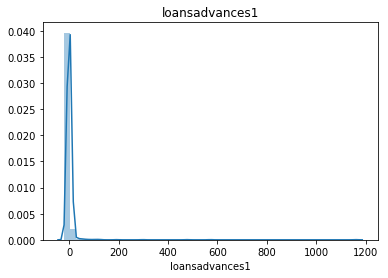

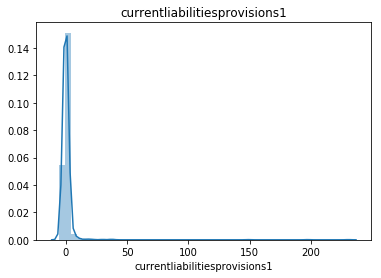

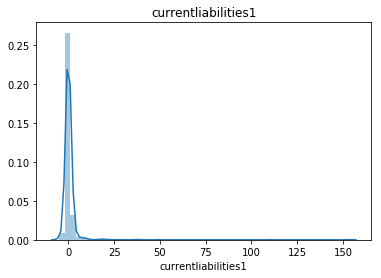

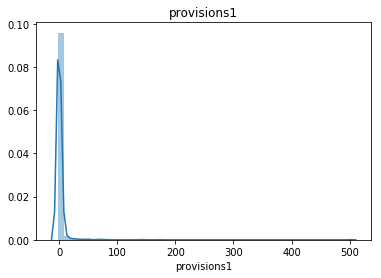

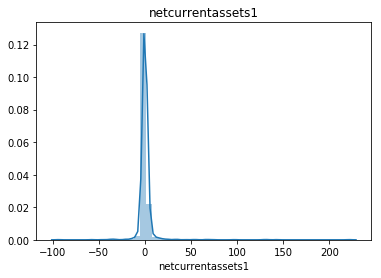

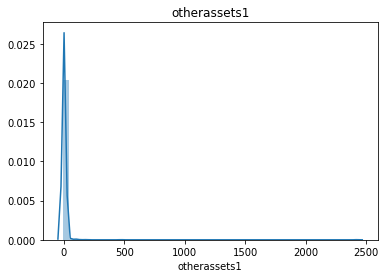

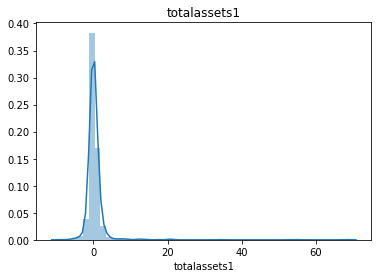

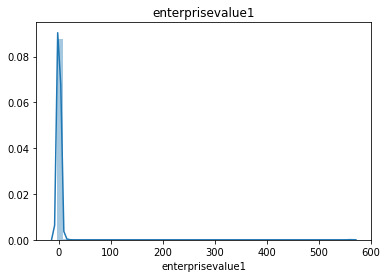

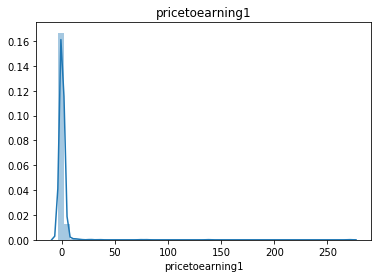

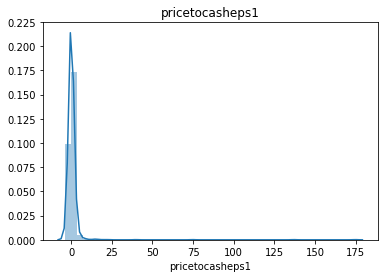

In [383]:
for i in features[10:20]:
    plt.figure()
    plt.title(i)
    sns.distplot(total[i])

In [369]:
for i in good_features:
    print(np.percentile(total[i],5) , np.percentile(total[i] ,95  ))

NameError: name 'good_features' is not defined

In [279]:
scaler = RobustScaler()
# scaler = StandardScaler()
total[features] = scaler.fit_transform(total[features])

In [179]:
feats_32 = list(set(['nonencumberedintotalpromotersholding1', 'nonencumberednoofshares2', 'pricetobv2', 
 'patm_dd1', 'pbt_dd2', 'pbdtm_dd4', 'pricetoearning_mom_1']+['otherincome1', 'adjustedprofitafterextraordinaryitem1', 'employeeexpenses2', 
 'depreciation2', 'totalexpenditure4', 'year4', 'tax_dd1', 'pricetobv_mom_7']+['totalexpenditure2', 'pledgedencumberedintotalequity2', 'netextraordinaryincomeexpense4', 
 'epsafterexceptionalextraordinaryitemsbasic_dd1', 'pbdtm_dd2', 'year_dd2', 'pbt_dd4', 'pbdtm_dd4', 
 'pricetocashflow_mom_3', 'marketcapsales_mom_7']+['interest1', 'netextraordinaryincomeexpense1', 'tax_dd1', 'pbidt_dd2',
 'interest_dd2', 'tax_dd2', 'netextraordinaryincomeexpense_dd2', 'pbdtm_dd2', 'patm_dd2', 'evtopbidt_mom_1']
))

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [357]:


# model = LogisticRegression(class_weight={1:3,-1:3,0:1})

model = XGBClassifier(
    max_depth=3,
    gamma=1,
    eta=0.8,
    subsample=0.7,
    reg_alpha=0.5,
    reg_lambda=0.5,
    objective="multi:softmax"
)

# model = RandomForestClassifier(max_depth=3,n_estimators=50,class_weight={1:5,-1:5,0:1})

In [299]:
from sklearn.ensemble import VotingClassifier

In [300]:
importlib.reload(sliding_cv)

<module 'sliding_cv' from '/home/nithish/workspace/python/generic_tools/sliding_cv.py'>

In [366]:
total_test_ , total_preds,total_gold,tp,tt = sliding_window_preds(model , 
                                                            total , features,
                                                            new_cv[-5:-1],fr=(5,15),feat_select=False,
                                                                 n_comps=6)

actual (839, 99)
projected (839, 6)
n_comps explained variance 6 0.9503123861241793
actual (865, 99)
projected (865, 6)
n_comps explained variance 6 0.947117923926068
actual (885, 99)
projected (885, 6)
n_comps explained variance 6 0.9742600883533858
actual (909, 99)
projected (909, 6)
n_comps explained variance 6 0.980798828055059


In [359]:
print(classification_report(total_gold , total_preds))

              precision    recall  f1-score   support

          -1       0.33      0.01      0.02        82
           0       0.69      0.96      0.81       266
           1       0.11      0.05      0.07        40

   micro avg       0.66      0.66      0.66       388
   macro avg       0.38      0.34      0.30       388
weighted avg       0.56      0.66      0.56       388



In [360]:
print(classification_report(tt.target_class , tp))

              precision    recall  f1-score   support

          -1       0.94      0.23      0.37       556
           0       0.71      1.00      0.83      2228
           1       0.93      0.30      0.45       714

   micro avg       0.73      0.73      0.73      3498
   macro avg       0.86      0.51      0.55      3498
weighted avg       0.79      0.73      0.68      3498



In [351]:
sl_rules = {'target': 10, 'stop_loss': -10, 'mode': 'xyz'}
signals_list = [1,-1]
portfolio_limits ={"single_order_value" : 600000, "max_exposure_value" : 1200000,
                                                    "leverage":0.5, "slippage_cost" : 0.002}

In [365]:
features

['reservessurplus1',
 'loanfunds1',
 'otherliabilities1',
 'totalliabilities1',
 'fixedassets1',
 'investments1',
 'currentassetsloansadvances1',
 'sundrydebtors1',
 'cashbankbalance1',
 'othercurrentassets1',
 'loansadvances1',
 'currentliabilitiesprovisions1',
 'currentliabilities1',
 'provisions1',
 'netcurrentassets1',
 'otherassets1',
 'totalassets1',
 'enterprisevalue1',
 'pricetoearning1',
 'pricetocasheps1',
 'evtopbidt1',
 'dividendyield1',
 'pricetobv1',
 'pricetocashflow1',
 'marketcapsales1',
 'eps1',
 'reservessurplus2',
 'totalliabilities2',
 'fixedassets2',
 'investments2',
 'currentassetsloansadvances2',
 'sundrydebtors2',
 'cashbankbalance2',
 'currentliabilitiesprovisions2',
 'currentliabilities2',
 'provisions2',
 'netcurrentassets2',
 'totalassets2',
 'enterprisevalue2',
 'pricetoearning2',
 'pricetocasheps2',
 'evtopbidt2',
 'pricetobv2',
 'pricetocashflow2',
 'marketcapsales2',
 'bookvalue2',
 'eps2',
 'reservessurplus_dd1',
 'totalliabilities_dd1',
 'fixedassets_

In [352]:
test_ret_ = all_returns_local(total_test_,total_preds,signals_list,df_prices_sub,sl_rules,portfolio_limits)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [353]:
test_ret_[-1]

{'pnl': -22.300771090433287,
 'trades': 19,
 'net_pnl': -26.100771090433287,
 'max_exposure': 3,
 'drawdown': -322360.5016374577,
 'capital_required': 1522360.5016374576,
 'roi': -10.2869607017625,
 'hit_rate': 52.63157894736842,
 'trades_list_pnl': [6.811154293495218,
  3.0424873140105,
  3.7248000000000028,
  -14.444444444444445,
  2.6649473457983963,
  11.518111518111516,
  -10.775862068965518,
  -10.158311345646437,
  6.46892655367231,
  -11.372549019607844,
  5.159420289855072,
  -11.989909482119002,
  -10.732323232323232,
  -7.375514788468744,
  -5.736552567237158,
  12.820512820512821,
  -6.181938180618184,
  3.943773903541448,
  10.3125],
 'exposure_hit_days': 1,
 '10_percentile_trade': -11.989909482119002,
 '25_percentile_trade': -10.732323232323232,
 '50_percentile_trade': 2.6649473457983963,
 '75_percentile_trade': 5.159420289855072,
 '90_percentile_trade': 10.3125}

In [339]:
import seaborn as sns

In [342]:
total[total.enterprisevalue1>1]['target_class'].value_counts()

 0    138
 1     59
-1     51
Name: target_class, dtype: int64

In [341]:
sum(total.enterprisevalue1>1)

248

In [345]:
# for i in features:
#     plt.figure()
#     sns.factorplot(x='target_class',y=i,data=total,kind='bar')

In [217]:
train_ret_ = all_returns_local(tt,tp,signals_list,df_prices_sub,sl_rules,portfolio_limits)

[-1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1

backtest between dates  2011-09-05 2018-02-07
the max exposure limit is qty:  8


In [346]:
train_ret_[-1]

NameError: name 'train_ret_' is not defined

In [2237]:
view_yearwise(total_test_,  total_preds,signals_list,
                  df_prices_sub,sl_rules,portfolio_limits)

[1, 1, 1, 1, -1, 1, 0, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 0, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 0, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 0, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 0, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 0, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 0, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1]
backtest between dates  2013-10-17 2013-11-27
the max exposure limit is qty:  4
2013 1.043891

69.01408450704226

In [1594]:

def view_yearwise(total_test, total_preds,signals_list,
                  df_prices_sub,sl_rules,portfolio_limits):
    
    signal_df = native_signal_df(total_test, total_preds)
    
    for i in np.unique([i.year for i in signal_df.date]):
        sub_sig = signal_df[signal_df.date.apply(lambda x:x.year) == i]
#         sub_sig = sub_sig.dropna()
    #     print(sub_sig.shape)
    #     print(sub_sig)
        try:
            test_all = backtest.get_return_day_wise(sub_sig,  signals_list, df_prices_sub,
                                                       'open_price', 'open_price',sl_rules,
                                                     portfolio_limits)
            print(i , test_all[-1]['roi'] , test_all[-1]['hit_rate'])
    
        except:
            continue
            print(i,'skipped')
    

In [1469]:
log_model = LogisticRegression()

total_test_ , preds1,total_gold = sliding_window_preds( log_model, 
                                                            total , linear_features,
                                                                    new_cv[-2:])

svc_model = SVC()
total_test_ , preds2,total_gold = sliding_window_preds( svc_model, 
                                                            total , svm_features,

                                                       new_cv[-2:])

total_preds = []
for i,j in zip(preds1,preds2):
    total_preds.append(i+j)
total_preds = np.array(total_preds)
total_preds[total_preds==-2]=-1
total_preds[total_preds==2]= 1

agg_preds = []
for i,j in zip(preds1 , preds2):
    if i==j:
        agg_preds.append(i)
    else:
        agg_preds.append(0)

ret_ = all_returns_local(total_test_,agg_preds,signals_list,df_prices_sub,sl_rules,portfolio_limits)

ret_[-1]

print(ret_list)
print('mean return is ' ,np.mean(ret_list))

ret_ = backtest.get_return_day_wise(native_signal_df(total_test_,total_preds), signals_list, df_prices_sub,
                                                       'open_price', 'open_price',sl_rules,
                                                     portfolio_limits )

ret_[-1]

array(['ICICIBANK', 'KOTAKBANK', 'MOTHERSUMI', 'SBIN', 'RELCAPITAL',
       'TATAMOTORS', 'IDFC', 'M&MFIN', 'CHOLAFIN', 'EICHERMOT',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'APOLLOTYRE', 'SYNDIBANK',
       'SRTRANSFIN', 'HDFC', 'CEATLTD', 'L&TFH', 'IBULHSGFIN',
       'MANAPPURAM', 'MCX', 'EQUITAS', 'UJJIVAN', 'BAJFINANCE'],
      dtype=object)

In [496]:
ret_[-1]

{'pnl': 105.91707704926581,
 'trades': 97,
 'net_pnl': 76.81707704926582,
 'max_exposure': 5,
 'drawdown': -301205.1375183089,
 'capital_required': 1201205.1375183088,
 'roi': 38.37000424821858,
 'hit_rate': 54.63917525773196,
 'trades_list_pnl': [8.08620689655172,
  -1.0544478527607362,
  5.763567522086659,
  1.1083743842364533,
  8.568965517241388,
  9.868421052631579,
  -3.3154491676984486,
  -1.3744147409756868,
  -1.0889973713856467,
  -3.1146767343086332,
  9.732709151313792,
  2.323838080959514,
  6.532951289398281,
  -6.329794382475474,
  6.00279690757012,
  3.1701890989988875,
  8.824199180203431,
  6.72782874617737,
  -3.8567177843900207,
  7.307593747330653,
  7.245622513848101,
  -1.340033500837521,
  6.244974537657473,
  -4.352678571428578,
  2.2956101490132936,
  3.5211267605633805,
  -1.0925734534179798,
  -3.125,
  3.647727272727275,
  -1.7912618150571689,
  6.090373280943026,
  -1.0216847372810676,
  8.316603464941641,
  4.140786749482402,
  2.0312499999999956,
  -0.99

In [478]:
ret_list

[32.53413120178049,
 22.439350853030188,
 18.4941921431671,
 -14.334784296409397,
 -4.146744811014419,
 0.45376361056670683]

In [422]:
total_test_ , total_preds,total_gold,ret_list = sliding_window_preds(model , 
                                                            total , list(sfs1.k_feature_names_),
                                                                    new_cv[-2:],sl_rules,signals_list,
                                                                          portfolio_limits)

/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 0 -1  1  1 -1  1 -1  1 -1  1  1 -1  0  1 -1  1  1  1  1  1 -1  1 -1]


/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

backtest between dates  2018-03-09 2018-08-28
the max exposure limit is qty:  2
[ 1 -1  0 -1  1  1 -1  1]
backtest between dates  2018-10-22 2018-11-15
the max exposure limit is qty:  2


-4.8148302283138715


In [358]:
print(classification_report ( total_gold , total_preds) )


              precision    recall  f1-score   support

          -1       0.42      0.50      0.46        56
           0       0.20      0.11      0.14        19
           1       0.47      0.46      0.47        61

   micro avg       0.43      0.43      0.43       136
   macro avg       0.36      0.35      0.35       136
weighted avg       0.41      0.43      0.42       136



In [ ]:
print(done)

In [263]:
model = lgbm.LGBMClassifier(n_estimators=100,num_leaves=30,max_depth=5,learning_rate=0.1 , n_jobs=5)

/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [193]:
23/61

0.3770491803278688

In [194]:
27/61

0.4426229508196721

In [141]:
signal_df = native_signal_df(total_test_ , total_preds)

[-1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 0, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 0, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 0, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 0, 1, -1, 1, 1, 1, -1, 1, -1, 0, -1, 1, 0, 1]


/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

/home/nithish/anaconda3/envs/fund_delta_model/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0
216
backtest between dates  2010-02-01 2010-12-08
the max exposure limit is qty:  6
2010 -9.88823085323873
199
backtest between dates  2011-02-07 2011-11-25
the max exposure limit is qty:  6
2011 15.566803895734319
194
backtest between dates  2012-02-10 2012-11-22
the max exposure limit is qty:  6
2012 1.1324053379049899
195
backtest between dates  2013-02-08 2013-11-25
the max exposure limit is qty:  6
2013 11.520421740963592
196
backtest between dates  2014-02-03 2014-11-26
the max exposure limit is qty:  6
2014 14.565667422873071
193
backtest between dates  2015-02-09 2015-11-19
the max exposure limit is qty:  6
2015 -2.962238133127587
196
backtest between dates  2016-02-08 2016-11-25
the max exposure limit is qty:  6
2016 11.145560282675763
203
backtest between dates  2017-02-02 2017-11-27
the max exposure limit is qty:  6
2017 8.87182236218999
199
backtest between dates  2018-02-05 2018-11-27
the max exposure limit is qty:  6
2018 -5.086183193939133


In [92]:

test_all = backtest.get_return_day_wise(signal_df,  [1,-1], x,
                                               'open_price', 'open_price',sl_rules=sl_rules,
                                             portfolio_limits ={"single_order_value" : 600000, "max_exposure_value" : 1200000,
                                                               "leverage":0.5, "slippage_cost" : 0.003})

print(test_all[-1])


2012-02-10 2018-11-27
<class 'datetime.date'> <class 'datetime.date'>
backtest between dates  2012-02-10 2018-11-27
the max exposure limit is qty:  4
{'pnl': 192.08016254739258, 'trades': 143, 'net_pnl': 149.18016254739257, 'max_exposure': 4, 'drawdown': -152274.1148637146, 'capital_required': 1352274.1148637147, 'roi': 66.19079411828893, 'hit_rate': 61.53846153846154, 'trades_list_pnl': [-4.827207899067462, 5.697445972495086, 3.5186129525752197, 3.9888682745825577, 4.704752760441676, 3.2365145228215817, 7.749077490774899, 3.352729287891389, 4.921135646687705, -0.618556701030922, -5.275862068965521, 6.857142857142857, 9.975734699379887, 5.012531328320802, 9.45273631840796, -3.5692468801815243, -5.142700329308454, 6.306931552008332, 5.172413793103448, 15.0848896434635, -4.2301911101567535, 5.256233142556417, 4.252873563218391, 4.552407932011326, -6.965189873417719, -1.838235294117647, 3.0741410488245933, -3.4300791556728347, 0.9638554216867435, 4.069767441860465, 3.4302325581395383, 1.2

In [151]:
len([x for x in test_all[-1]["trades_list_pnl"] if x > 0])

49

In [152]:
test_all[-1]

{'pnl': 115.55537712937286,
 'trades': 68,
 'net_pnl': 101.95537712937286,
 'max_exposure': 4,
 'drawdown': -108775.0369594307,
 'capital_required': 1008775.0369594307,
 'roi': 60.64109839792149,
 'hit_rate': 72.05882352941177,
 'trades_list_pnl': [-4.335664335664336,
  1.7452006980802792,
  4.476973731096515,
  -2.3124115148655027,
  3.118198164095774,
  1.3179190751445087,
  -0.06621704475781283,
  1.2912144474837521,
  4.096743945419854,
  3.0298847401477045,
  4.840415603807625,
  3.072463768115942,
  -1.9796271381895119,
  3.0823648307225873,
  -8.352237574757682,
  3.2508389261744965,
  5.846279640228938,
  -1.458216489063389,
  3.213317847464193,
  4.455760661998727,
  4.367301231802911,
  -6.344294003868463,
  0.7833333333333409,
  3.4933870040252955,
  -0.5064935064935036,
  3.686635944700461,
  3.87944854119911,
  6.68269230769231,
  3.012211668928093,
  4.157549234135668,
  3.069787985865719,
  5.458715596330277,
  -6.61187896899514,
  3.0244374546334383,
  5.631659056316590

In [ ]:


pd.DataFrame(test_all[1]).T.to_csv('./reports/comapnywise.csv',index=False)

features_30 = ['price_to_bv1', 'market_capsales1', 'gross_profit_margin1', 
               'net_sales1', 'other_income1', 'total_expenditure1', 'tax1', 
               'price_to_bv2', 'market_capsales2', 'net_sales2', 'other_income2',
               'ebitda2', 'reported_profit_after_tax2', 'total_expenditure2', 'price_to_bv4', 
               'market_capsales4', 'ebitda4', 'reported_profit_after_tax4', 'total_expenditure4', 
               'tax4', 'ebt4', 'net_sales_dd1', 'ebitda_dd1', 'net_profit_margin_dd2', 'other_income_dd2',
               'reported_profit_after_tax_dd2', 'market_capsales_dd4', 'reported_profit_after_tax_dd4', 
               'total_expenditure_dd4', 'tax_dd4']



model = lgbm.LGBMClassifier(n_estimators=50,num_leaves=30,max_depth=5,learning_rate=0.1 , n_jobs=5)

model.fit(X_train[:,range(10)] , y_train  ) 

all_features[:10]

X_train.shape ,X_test.shape

preds = model.predict(X_test[:,range(10)] )

print(classification_report ( y_test , preds) )

features_10 = ['netsales2' ,
'dividendyield2' ,
'epsafterexceptionalextraordinaryitemsbasic4' ,
'pricetoearning4' ,
'grosssales_dd2' ,
'otherexpenses_dd2' ,
'pricetoearning_dd2' ,
'marketcapsales_dd2' ,
'pricetocasheps_mom_1' ,
'eps_mom_1' ]

sl_rules =  {"target": 10, "stop_loss": 3,'mode':'xyz'},

# total.to_csv('./reports/total_new.csv',index=False)

In [ ]:
test.rename(columns = {'date_y':'date'} , inplace=True)
test['exit_date'] = test['exit_date7']

import random

random_preds = [ random.choice([-1,0,1]) for _ in range(1415) ] 

signal_df = make_signal_df(test,preds)

import backtest



signal_df.date = pd.to_datetime(signal_df.date)
signal_df.sq_off_date = pd.to_datetime(signal_df.sq_off_date)

signal_df.date = signal_df.date.apply(lambda x: x.date())
signal_df.sq_off_date = signal_df.sq_off_date.apply(lambda x: x.date())

# df_prices["[NSE Symbol"] = df_prices.CO_CODE.apply(lambda x: map_func(x))

# df_prices.dropna(subset=["[NSE Symbol"] , inplace=True)

# rename_cols_2 = {
#     "[NSE Symbol":'nse_symbol',
#     "[Open Price": "open_price",
#     "[Date": "date",
#     "[Close Price": "close_price",
# }

# df_prices.rename(columns=rename_cols_2,inplace=True)
# df_prices.reset_index(inplace=True,drop=True)

# df_prices = df_prices[list(rename_cols_2.values())]

x = df_prices[df_prices.nse_symbol.isin(signal_df.ticker.unique())]

x.date = pd.to_datetime(x.date)

x = x[x.date.dt.year>2010]

x.date = x.date.apply(lambda x:x.date())

x = x.sort_values('date')

x.rename(columns={'nse_symbol':'ticker'},inplace=True)


import backtest

In [ ]:
sl_rules = {'target': 6, 'stop_loss': 3, 'mode': 'xyz'}

test_all = backtest.get_return_day_wise(signal_df, [-1,1], x,
                                               'open_price', 'open_price',sl_rules=sl_rules,
                                             portfolio_limits ={"single_order_value" : 600000, "max_exposure_value" : 600000,
                                                               "leverage":0.5})

test_all[-1]

In [ ]:
test_all[0].exposure.max()

In [97]:

    
def make_signal_df(test,preds):
    signal_df = test[['date']]
#     signal_df.rename(columns={'date': 'datetime'}, inplace=True)
    signal_df['date'] = pd.to_datetime(signal_df['date'])
    signal_df['date'] = signal_df['date'].apply(lambda x: x.date())
    signal_df['signal'] = preds
#     diff_ = int(name.split('_')[1])
    col_name_ = 'exit_date'#+str(diff_)
    signal_df['sq_off_date'] = test[col_name_]
    signal_df['sq_off_date'] = pd.to_datetime(signal_df['sq_off_date'])
    signal_df['sq_off_date'] = signal_df['sq_off_date'].apply(
        lambda x: x.date())
    
    #edit for exiting in one day
#    signal_df['sq_off_date'] = signal_df['date'].apply(
#        lambda x: x + datetime.timedelta(1)  )
#    

    signal_df['ticker'] = test.nse_symbol

#     signal_df.drop(columns='datetime', axis=1, inplace=True)
    
    signal_df.date = pd.to_datetime(signal_df.date)
    signal_df.sq_off_date = pd.to_datetime(signal_df.sq_off_date)
    signal_df.date = signal_df.date.apply(lambda x: x.date())
    signal_df.sq_off_date = signal_df.sq_off_date.apply(lambda x: x.date())
    

    return signal_df


In [ ]:
len([x for x in test_all[-1]["trades_list_pnl"] if x >0])/ len(test_all[-1]["trades_list_pnl"])

In [ ]:
test_all[0]["date"] = test_all[0].index
test_all[0]["year"] = test_all[0]["date"].apply(lambda x: x.year)
yearwise = test_all[0][["trades_daily", "returns_daily", "year"]].groupby("year").agg({"trades_daily" : "sum",
                                                                                       "returns_daily" : "sum"})

In [ ]:
yearwise

In [ ]:
"""
    stoploss 
    dates of signal and square off
    features print check if its not considering future time values  

"""